# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 4: Badanie relacji między punktami (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [2]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
HP=pd.read_csv('dane_tymczasowe_HP 1.csv')
M=pd.read_csv('dane_tymczasowe_M 1.csv')
R=pd.read_csv('dane_tymczasowe_R.csv')
#raise NotImplementedError()
def regular_on_rectangle(grid, x_lim, y_lim,dlugosc_boku):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """ 
    #YOUR CODE HERE
    #dx=(Xmax-Xmin)/liczba punktów w x
    #dy=(Ymax-Ymin)/liczba punktów w y
    #np.linspace lub np.arange
    #np.meshgrid
    #dx=(x_lim[1]-x_lim[0])/grid[1]
    #dy=(y_lim[1]-y_lim[0])/grid[0]
    
    #x=np.linspace(0.5*dx,x_lim[1]-(0.5*dx),grid[1])
    #y=np.linspace(0.5*dy,y_lim[1]-(0.5*dy),grid[0])
    x=np.linspace(dlugosc_boku,x_lim[1],(grid[1]+1))
    y=np.linspace(dlugosc_boku,y_lim[1],(grid[0]+1))
    
    d1,d2=np.meshgrid(x,y)
 
    
    #for i in range(d1.shape[0]):
     #   for j in range(d2.shape[1]):
      #      d1[i,j]+= np.random.uniform(-0.5*dx,0.5*dx)*random_component
      #      d2[i,j]+=np.random.uniform(-0.5*dy,0.5*dy)*random_component
    
    
    
    d = {'x': np.concatenate(d1), 'y': np.concatenate(d2)}
    df = pd.DataFrame(data=d)     

    return df
    
    
    #raise NotImplementedError()

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()

### Zadanie 1: Wykres Morishity (25 pkt)

Przygotuj funkcję `morishita_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Morishity. 

Następnie wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. Wykonaj obliczenia dla obszaru podzielonego na 2x2, 3x3, ... 40x40 podobszarów w poziomie i w pionie.

Przedstaw wyniki analizy graficznie w postaci wykresów punktówych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy Morishity w dolnym wierszu figury.

Algorytm postępowania:
1. Kolejno dzielimy obszar na rosnącą lub malejącą liczbę kwadratowych podobszarów.
2. Dla każdego z podziałów obliczamy wartość indeksu: <br/>
$MI = L \sum_{i=1}^L \frac{n_i (n_i-1)}{N(N-1)}$ <br/>
gdzie: $L$ - liczba podobszarów, $N$ - liczba punktów, $n_i$ - liczba punktów w obrębie i-tego podobszaru.
3. Zestawiamy w tabeli długości boków podobszarów w poszczególnych podziałach z obliczonymi dla nich wartości indeksu $MI$.

#### a) Przygotowanie funkcji

In [34]:
def morishita_plot_data(points, bins_list, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins_list: list
        Lista zawierająca wszystkie zestawy parametrów określających liczbę podobszarów w poziomie i pionie, dla których mają zostać przeprowadzone obliczenia.
        Przykład: [[2, 2], [4, 4], [8, 8], [16, 16]]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    morishita_index: DataFrame
        Tablica zawierająca dwie kolumny:
        - "BD" - długości boków podobszarów,
        - "MI" - wyliczone wartości indeksów MI.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    dlugosci_bokow=0
    X=points['X']
    X=X.to_numpy()
    Y=points['Y']
    Y=Y.to_numpy()
 
    MI2=0
    for i in range(0,len(bins_list)):   #iterujemy po podzialach obszaru wykresu
        
        dlugosci_bokow=np.append(dlugosci_bokow,(((x_lim[1]-x_lim[0])/((bins_list[i][0])+1))))
        
 
       

        #tu
        histogram=np.histogram2d(points["X"], points["Y"], bins=bins_list[i], range=[x_lim, y_lim])
        ni_dla_obszaru=np.transpose(histogram[0])

        nn=ni_dla_obszaru.flatten()
        MI_tmp2=0
        #ut
          
        for u in range(0,len(ni_dla_obszaru.flatten())):
            MI_tmp2=MI_tmp2+(((nn[u]-1)*nn[u])/((len(points)-1)*len(points)))
        
        MI2=np.append(MI2,(MI_tmp2*len(ni_dla_obszaru.flatten())))
        
        
        
        
        
        
    dlugosci_bokow = np.delete(dlugosci_bokow,0) # dlugosc bokow wychodzi dobrze
    MI2=np.delete(MI2,0)
    df=pd.DataFrame()
    df['BD']=dlugosci_bokow
    df['MI']=MI2
    
    return df
    

#### b) Wygenerowanie danych

In [35]:
# YOUR CODE HERE
#raise NotImplementedError()

#r=morishita_plot_data(R,[[40,40],[39,39],[38,38],[37,37],[36,36],[35,35],[34,34],[33,33],[32,32],[31,31],[30,30],[29,29],[28,28],[27,27],[26,26],[25,25],[24,24],[23,23],[22,22],[21,21],[20,20],[19,19],[18,18],[17,17],[16,16],[15,15],[14,14],[13,13],[12,12],[11,11],[10,10],[9,9],[8,8],[7,7],[6,6],[5,5],[4,4],[3,3],[2,2],[1,1]],[0, 10],[0, 10])
#hp=morishita_plot_data(HP,[[40,40],[39,39],[38,38],[37,37],[36,36],[35,35],[34,34],[33,33],[32,32],[31,31],[30,30],[29,29],[28,28],[27,27],[26,26],[25,25],[24,24],[23,23],[22,22],[21,21],[20,20],[19,19],[18,18],[17,17],[16,16],[15,15],[14,14],[13,13],[12,12],[11,11],[10,10],[9,9],[8,8],[7,7],[6,6],[5,5],[4,4],[3,3],[2,2],[1,1]],[0, 10],[0, 10])
m=morishita_plot_data(M,[[40,40],[39,39],[38,38],[37,37],[36,36],[35,35],[34,34],[33,33],[32,32],[31,31],[30,30],[29,29],[28,28],[27,27],[26,26],[25,25],[24,24],[23,23],[22,22],[21,21],[20,20],[19,19],[18,18],[17,17],[16,16],[15,15],[14,14],[13,13],[12,12],[11,11],[10,10],[9,9],[8,8],[7,7],[6,6],[5,5],[4,4],[3,3],[2,2],[1,1]],[0, 10],[0, 10])




#### c) Wizualizacja

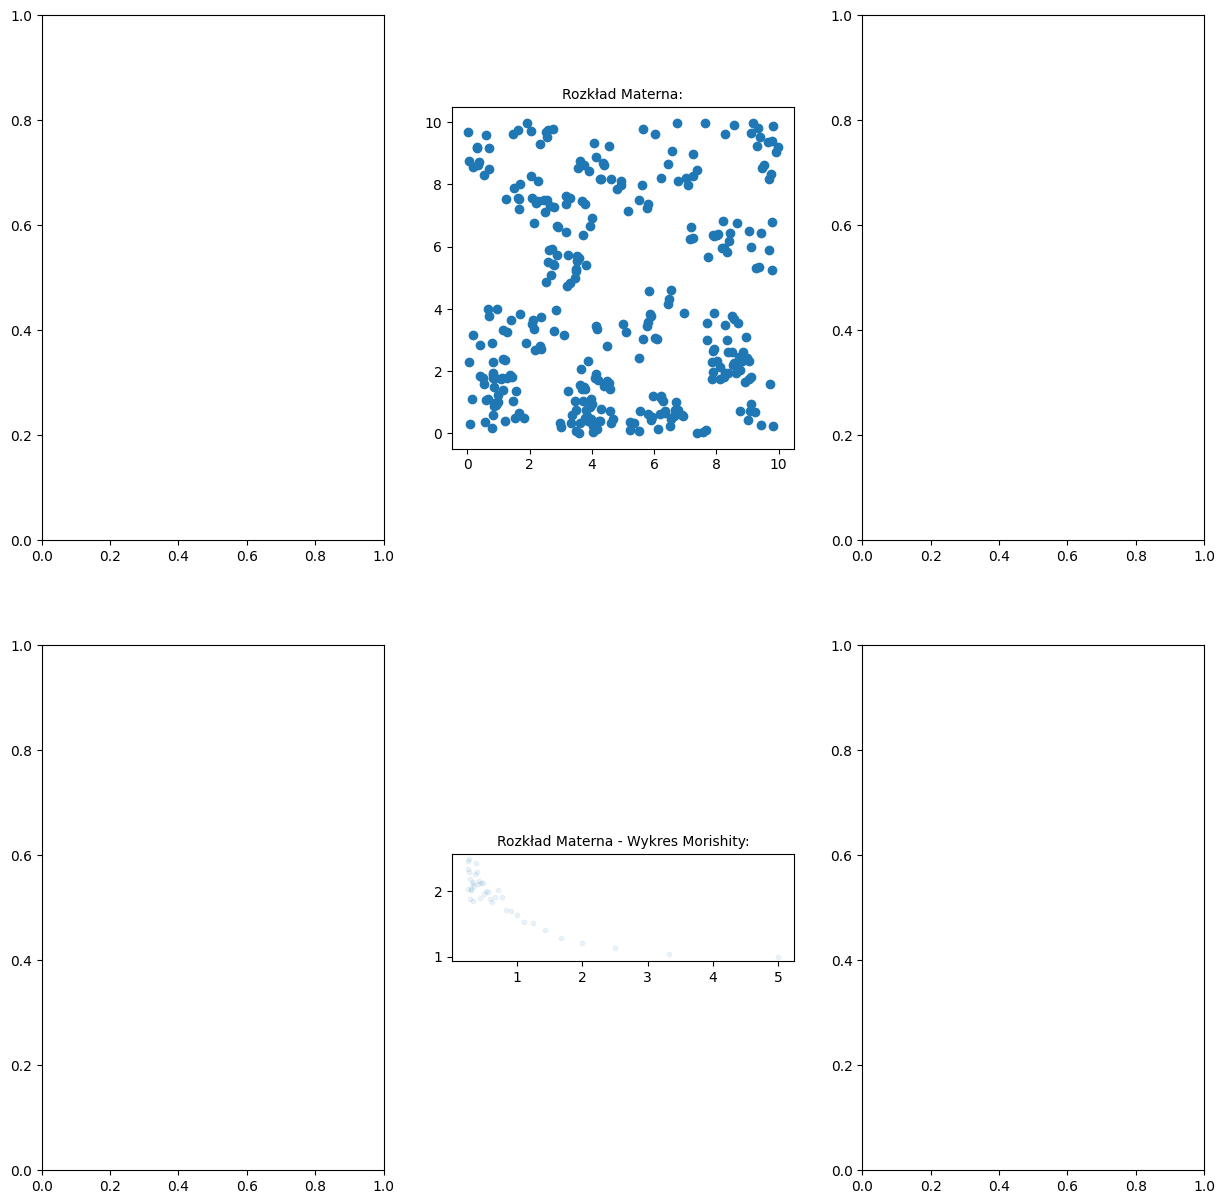

In [36]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots(2,3,figsize=(15,15))
#ax[0,0].scatter(data=HP,x="X",y="Y")
#ax[0,0].set_title("Jednorodny rozkład Poissona:",size = 10)
#ax[0, 0].set_aspect('equal')
ax[0,1].scatter(data=M,x="X",y="Y")
ax[0,1].set_title("Rozkład Materna:",size = 10)
ax[0, 1].set_aspect('equal')
#ax[0,2].scatter(data=R,x="X",y="Y")
#ax[0,2].set_title("Rozkład regularny z komponentem losowym:",size = 10)
#ax[0, 2].set_aspect('equal')
#ax[1,0].scatter(data=hp,x="BD",y="MI", alpha=0.08,s=10)
#ax[1,0].set_title("Jednorodny rozkład Poissona - Wykres Morishity:",size = 10)
#ax[1, 0].set_aspect('equal')
ax[1,1].scatter(data=m,x="BD",y="MI", alpha=0.08,s=10)
ax[1,1].set_title("Rozkład Materna - Wykres Morishity:",size = 10)
ax[1, 1].set_aspect('equal')
#ax[1,2].scatter(data=r,x="BD",y="MI", alpha=0.08,s=10)
#ax[1,2].set_title("Rozkład regularny z komponentem losowym - Wykres Morishity",size = 10)
#ax[1,2].set_aspect('equal')

### Zadanie 2: Wykres Fry (20 pkt)

Przygotuj funkcję `fry_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Morishity.

Następnie wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów punktowych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy Fry w dolnym wierszu figury.

Algorytm postępowania: <br/>
Traktując kolejno każdy punkt analizowanego rozkładu jako początek układu współrzędnych zapisujemy współrzędne pozostałych punktów względem niego.
Rezultatem jest zbiór współrzędnych $n(n-1)$ punktów, gdzie $n$ to liczba punktów w analizowanym rozkładzie.

#### a) Przygotowanie funkcji

In [3]:
def fry_plot_data(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    fry_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
        ustaw przeźroczystość paramter alfa
    """    
    df = pd.DataFrame()
    print("Punkty")
    print(points)
    print("For")
    for index, row in points.iterrows():
       # print(points - row)
        df1= points - row
        print(len(df1))
        df1=df1.drop(index)
        print(len(df1))
        df = pd.concat([df,df1])
        print(len(df))
    return df
    print(df)
    # YOUR CODE HERE
   # raise NotImplementedError()

#### b) Wygenerowanie danych

In [4]:
# YOUR CODE HERE
HP_fry = fry_plot_data(HP)
#M_fry=fry_plot_data(M)
#R_fry=fry_plot_data(R)
#raise NotImplementedError()

Punkty
            X         Y
0    6.822147  8.770123
1    7.533902  5.034402
2    4.725901  8.450584
3    7.428728  1.133617
4    5.592175  0.454391
..        ...       ...
230  2.908054  4.516810
231  9.456160  2.624258
232  0.496754  9.959719
233  9.878335  8.047456
234  4.094739  3.971897

[235 rows x 2 columns]
For
235
234
234
235
234
468
235
234
702
235
234
936
235
234
1170
235
234
1404
235
234
1638
235
234
1872
235
234
2106
235
234
2340
235
234
2574
235
234
2808
235
234
3042
235
234
3276
235
234
3510
235
234
3744
235
234
3978
235
234
4212
235
234
4446
235
234
4680
235
234
4914
235
234
5148
235
234
5382
235
234
5616
235
234
5850
235
234
6084
235
234
6318
235
234
6552
235
234
6786
235
234
7020
235
234
7254
235
234
7488
235
234
7722
235
234
7956
235
234
8190
235
234
8424
235
234
8658
235
234
8892
235
234
9126
235
234
9360
235
234
9594
235
234
9828
235
234
10062
235
234
10296
235
234
10530
235
234
10764
235
234
10998
235
234
11232
235
234
11466
235
234
11700
235
234
11934
235
234
1

#### c) Wizualizacja

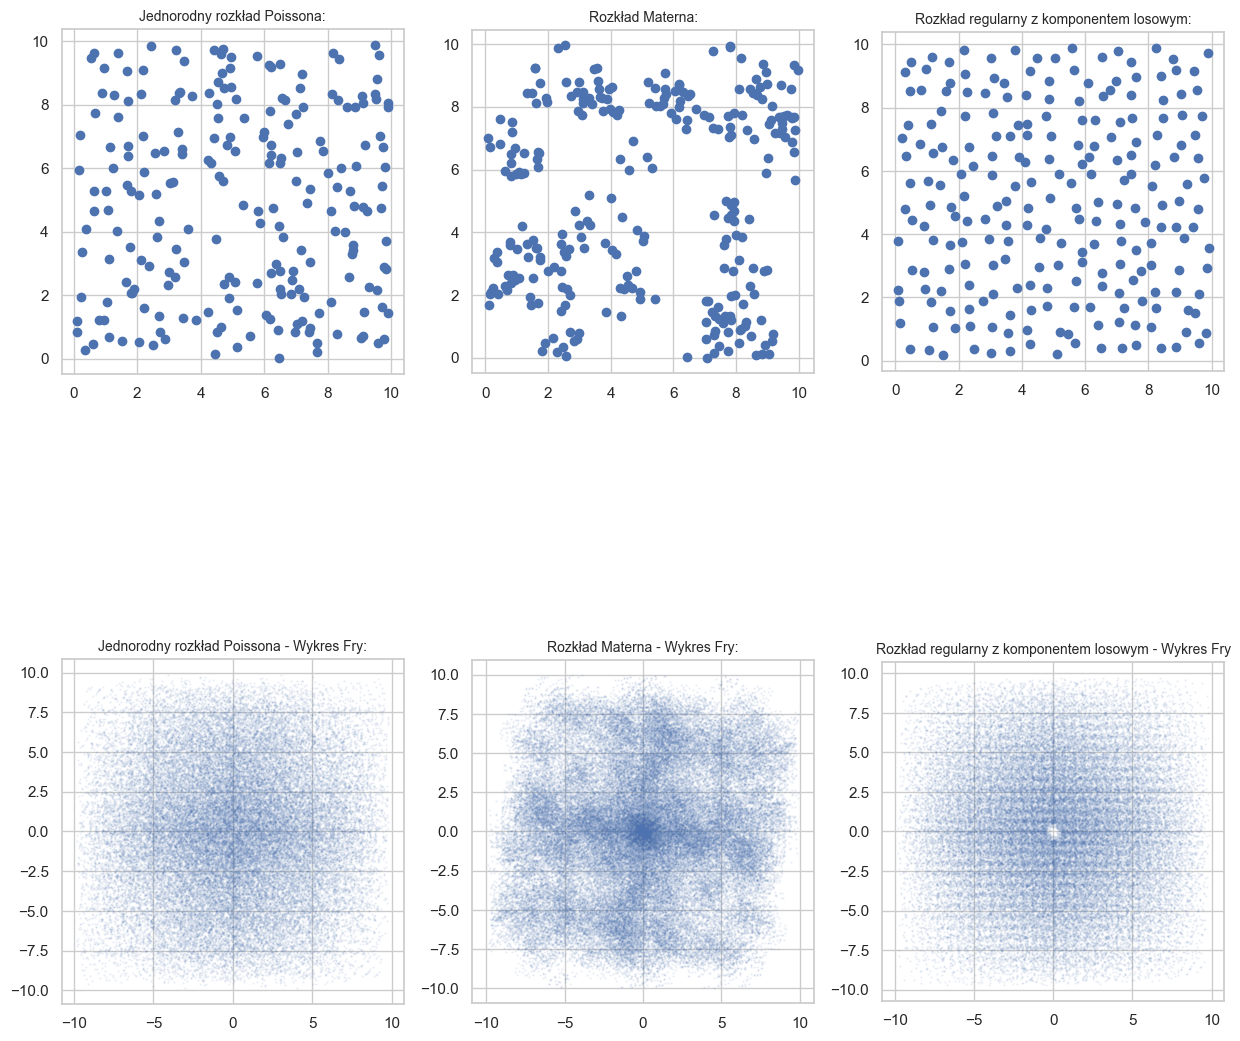

In [100]:
# YOUR CODE HERE
fig, ax = plt.subplots(2,3,figsize=(15,15))
ax[0,0].scatter(data=HP,x="X",y="Y")
ax[0,0].set_title("Jednorodny rozkład Poissona:",size = 10)
ax[0, 0].set_aspect('equal')
ax[0,1].scatter(data=M,x="X",y="Y")
ax[0,1].set_title("Rozkład Materna:",size = 10)
ax[0, 1].set_aspect('equal')
ax[0,2].scatter(data=R,x="X",y="Y")
ax[0,2].set_title("Rozkład regularny z komponentem losowym:",size = 10)
ax[0, 2].set_aspect('equal')
ax[1,0].scatter(data=HP_fry,x="X",y="Y", alpha=0.08,s=0.6)
ax[1,0].set_title("Jednorodny rozkład Poissona - Wykres Fry:",size = 10)
ax[1, 0].set_aspect('equal')
ax[1,1].scatter(data=M_fry,x="X",y="Y", alpha=0.08,s=0.6)
ax[1,1].set_title("Rozkład Materna - Wykres Fry:",size = 10)
ax[1, 1].set_aspect('equal')
ax[1,2].scatter(data=R_fry,x="X",y="Y", alpha=0.08,s=0.6)
ax[1,2].set_title("Rozkład regularny z komponentem losowym - Wykres Fry",size = 10)
ax[1,2].set_aspect('equal')
#raise NotImplementedError()